## Camera Lens Calibration with Black Body
### **Objective**: Thermal cameras do not provide precise temperature measurements to the decimal point. Therefore, we explored how different lenses with varying focal lengths affect the temperature measurement of a given blackbody temperature value. In this experiment, the blackbody temperature was initially set to 20°C, and the temperature was incrementally increased by 2.5°C until it reached 40°C.

### **Solution**:  We plotted the blackbody temperature against the temperature obtained from the thermal camera as follows.

#### Sidenote about Data Acquisition  
* Black Body 
* Camera: Flir E96
* Software: Research IR 64
#### Process Description  
* We recorded a video of the blackbody's hole while the camera was mounted on a tripod at a fixed distance. Once the video was obtained, the center of the blackbody's hole was annotated using Research IR, and the temperature values were saved as a CSV file.

In [16]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
# Black Body Temperature
X= []

# Thermal Temperature
Y= []

csv_loc = r"CameraCalibrationMetadata/17mm"


for f in sorted(os.listdir(csv_loc)):
    
    base_temperature = f.split(".")[0]
    
        
    df  = pd.read_csv(os.path.join(csv_loc,f))

    mean_temperature_value = df.stack().mean()

    X.append(float(base_temperature))
    Y.append(mean_temperature_value)

        

In [24]:
line_x = [X[0],X[-1]]
line_y = [Y[0],Y[-1]]

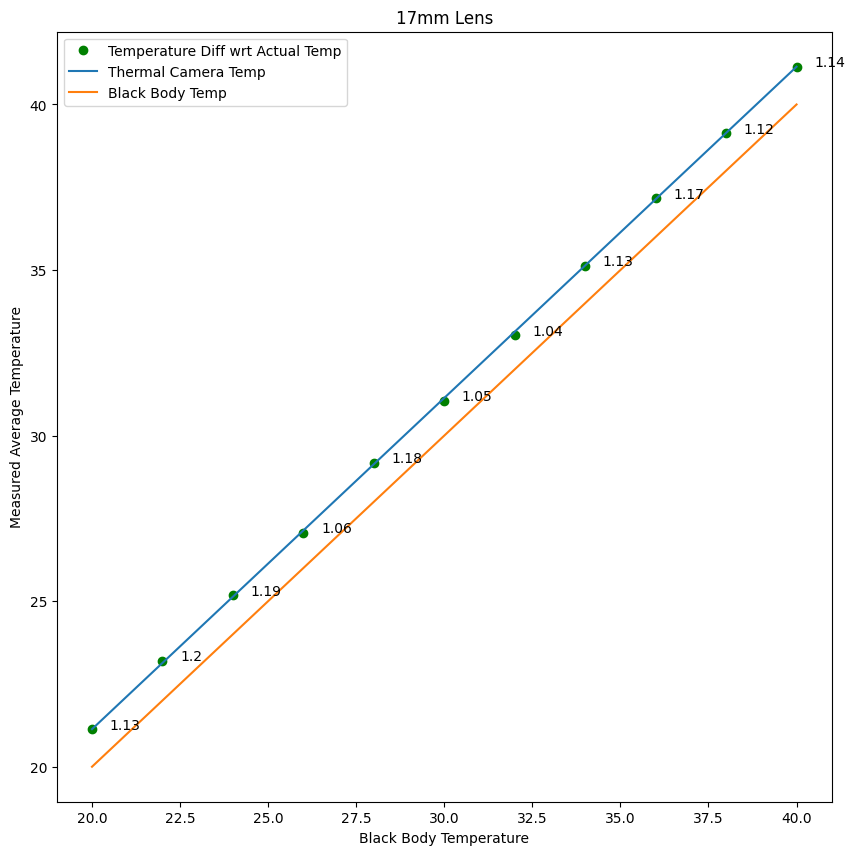

In [35]:

plt.figure(figsize=(10,10))
plt.plot(X,Y,'go')

plt.plot(line_x,line_y)
plt.plot(X,X)

# plt.anno
for x,y  in zip(X,Y):
    difference = round(y-x,2)
    plt.annotate(str(difference),(x+0.5,y))


plt.xlabel("Black Body Temperature")
plt.ylabel("Measured Average Temperature")

title = csv_loc.split("/")[-1]

plt.title(f"{title} Lens")
plt.legend(["Temperature Diff wrt Actual Temp","Thermal Camera Temp","Black Body Temp"])


### Conclusion
#### The temperature values between the blackbody and the thermal camera are not exactly the same. However, the error difference between the actual and obtained temperatures remains consistent across all temperature values. Therefore, we can conclude that the thermal camera is well-calibrated